#  Human mobility and COVID-19 epidemic (Incidence vs Mobility)

Student: Nguyen Xuan Tung

ID: 2005491


## Library

In [2]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import pandas as pd 
import seaborn as sns
import random 
import fileinput
import math
import operator
import scipy
import csv
import itertools
from covid19dh import covid19
import statistics

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

from scipy.stats import poisson
from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'

# importing the sys module
import sys 
sys.setrecursionlimit(10**6)

## Dataset implement

#### Import dataset of mobility

In [3]:
df_mobility_italy = pd.read_csv("Global_Mobility_Report.csv",sep=',')
df_mobility_italy

C:\Users\ADMIN\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8130020,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-16,NaN,NaN,NaN,NaN,35.0,NaN
8130021,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-17,NaN,NaN,NaN,NaN,37.0,NaN
8130022,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-20,NaN,NaN,NaN,NaN,26.0,NaN
8130023,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-21,NaN,NaN,NaN,NaN,28.0,NaN


In [4]:
region_name_mobi = list(df_mobility_italy["sub_region_1"].dropna().unique())
region_name_mobi

['Abu Dhabi',
 'Ajman',
 'Dubai',
 'Fujairah',
 'Ras al Khaimah',
 'Sharjah',
 'Umm Al Quawain',
 'Saint George',
 'Saint John',
 'Saint Mary',
 'Saint Paul',
 'Benguela Province',
 'Cabinda Province',
 'Huambo Province',
 'Huila Province',
 'Luanda Province',
 'Buenos Aires',
 'Buenos Aires Province',
 'Catamarca Province',
 'Chaco Province',
 'Chubut Province',
 'Cordoba',
 'Corrientes',
 'Entre Rios',
 'Formosa Province',
 'Jujuy',
 'La Pampa',
 'La Rioja Province',
 'Mendoza Province',
 'Misiones Province',
 'Neuquen',
 'Río Negro',
 'Salta Province',
 'San Juan Province',
 'San Luis Province',
 'Santa Cruz Province',
 'Santa Fe Province',
 'Santiago del Estero Province',
 'Tierra del Fuego Province',
 'Tucumán',
 'Burgenland',
 'Carinthia',
 'Lower Austria',
 'Salzburg',
 'Styria',
 'Tyrol',
 'Upper Austria',
 'Vienna',
 'Vorarlberg',
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western A

In [5]:
rmv_region_data = (np.array(df_mobility_italy['sub_region_2'].isnull()))
df_mobility_italy = df_mobility_italy[rmv_region_data]
df_mobility_italy

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129051,ZW,Zimbabwe,Midlands Province,NaN,NaN,ZW-MI,NaN,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-17,NaN,NaN,NaN,NaN,19.0,NaN
8129052,ZW,Zimbabwe,Midlands Province,NaN,NaN,ZW-MI,NaN,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-18,NaN,NaN,NaN,NaN,30.0,NaN
8129053,ZW,Zimbabwe,Midlands Province,NaN,NaN,ZW-MI,NaN,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-20,NaN,NaN,NaN,NaN,10.0,NaN
8129054,ZW,Zimbabwe,Midlands Province,NaN,NaN,ZW-MI,NaN,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-21,NaN,NaN,NaN,NaN,10.0,NaN


In [6]:
# drop the columns that we do not require for mobility analysis.
df_mobility_italy = df_mobility_italy.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8129051,Midlands Province,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-17,NaN,NaN,NaN,NaN,19.0,NaN
8129052,Midlands Province,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-18,NaN,NaN,NaN,NaN,30.0,NaN
8129053,Midlands Province,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-20,NaN,NaN,NaN,NaN,10.0,NaN
8129054,Midlands Province,ChIJb7hyxL5kyx4Ru9ER3JioNRc,2021-12-21,NaN,NaN,NaN,NaN,10.0,NaN


In [7]:
#drop the whole row itself if there exists NaN anywhere in dataframe.
df_mobility_italy = df_mobility_italy.dropna()
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
677,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-15,1.0,6.0,-2.0,-1.0,2.0,1.0
678,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-16,-2.0,5.0,2.0,-2.0,2.0,1.0
679,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-17,-3.0,2.0,4.0,-3.0,2.0,1.0
680,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-18,-3.0,2.0,1.0,-2.0,2.0,1.0
681,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-19,-3.0,1.0,0.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8120109,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-16,55.0,68.0,50.0,66.0,10.0,0.0
8120110,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-17,49.0,67.0,110.0,65.0,11.0,-1.0
8120111,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-18,61.0,72.0,74.0,75.0,26.0,-8.0
8120113,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-20,74.0,81.0,73.0,102.0,-1.0,0.0


In [8]:
df_mobility_italy.drop( df_mobility_italy[ df_mobility_italy['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

In [9]:
df_mobility_italy['retail_and_recreation_percent_change_from_baseline'] = df_mobility_italy['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['parks_percent_change_from_baseline'] = df_mobility_italy['parks_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['transit_stations_percent_change_from_baseline'] = df_mobility_italy['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['workplaces_percent_change_from_baseline'] = df_mobility_italy['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['residential_percent_change_from_baseline'] = df_mobility_italy['residential_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'] = df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [10]:
df_mobility_italy[df_mobility_italy["sub_region_1"]=='Veneto']

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4020689,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2020-02-15,5.428571,28.714286,32.000000,-3.571429,-2.142857,0.428571
4020690,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2020-02-16,6.000000,25.285714,35.428571,1.428571,-1.285714,0.142857
4020691,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2020-02-17,6.142857,22.571429,30.142857,4.000000,-0.571429,0.142857
4020692,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2020-02-18,6.714286,18.714286,28.428571,5.285714,-2.142857,0.000000
4020693,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2020-02-19,5.857143,13.714286,29.428571,8.142857,-1.428571,-0.285714
...,...,...,...,...,...,...,...,...,...
4021361,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-18,-5.285714,16.571429,14.857143,-21.285714,-6.142857,3.142857
4021362,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-19,-6.000000,17.714286,8.142857,-23.000000,-5.857143,3.428571
4021363,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-20,-5.000000,18.857143,7.571429,-22.857143,-5.857143,3.428571
4021364,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-21,-3.857143,20.714286,7.000000,-22.857143,-6.000000,3.285714


-------------------------------------------------------------------------------------------------------------------------

#### Import dataset of incedence

In [11]:
df_regionInc = pd.read_csv("2.csv",sep=',')
df_regionInc

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,0042529a,2020-01-12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
1,0042529a,2020-01-13,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
2,0042529a,2020-01-14,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
3,0042529a,2020-01-15,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
4,0042529a,2020-01-16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514672,vd0neba8,2021-12-24,NaN,NaN,NaN,NaN,129018.0,53998.0,52609.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514673,vd0neba8,2021-12-27,NaN,NaN,NaN,NaN,129041.0,54000.0,52615.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514674,vd0neba8,2021-12-28,NaN,NaN,NaN,NaN,129827.0,54039.0,52685.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514675,vd0neba8,2021-12-29,NaN,NaN,NaN,NaN,130671.0,54097.0,52804.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0


In [12]:
df_regionInc = df_regionInc[df_regionInc.iso_alpha_3=='ITA']
df_regionInc

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
12700,07945170,2020-02-24,0.0,0.0,0.0,58.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12701,07945170,2020-02-25,0.0,0.0,0.0,89.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12702,07945170,2020-02-26,0.0,0.0,0.0,114.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12703,07945170,2020-02-27,0.0,0.0,0.0,141.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12704,07945170,2020-02-28,0.0,0.0,0.0,169.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506538,fd58ab86,2021-12-28,85519.0,1722.0,77901.0,2627871.0,2989475.0,1311546.0,1268225.0,148.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506539,fd58ab86,2021-12-29,86290.0,1723.0,78104.0,2646074.0,3006494.0,1312816.0,1268822.0,157.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506540,fd58ab86,2021-12-30,87025.0,1726.0,78314.0,2664776.0,3023366.0,1313960.0,1269627.0,159.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506541,fd58ab86,2021-12-31,88234.0,1728.0,78514.0,2686968.0,3028667.0,1314212.0,1269901.0,162.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1


In [13]:
df_regionInc = df_regionInc.dropna(thresh=2)

In [14]:
df_regionInc.drop( df_regionInc[ df_regionInc['administrative_area_level_2'] =='P.A. Trento' ].index , inplace=True)
df_regionInc.drop( df_regionInc[ df_regionInc['administrative_area_level_2'] =='P.A. Bolzano' ].index , inplace=True)

In [15]:
Infected = df_regionInc['confirmed'] -  df_regionInc['recovered'] -  df_regionInc['deaths']

In [16]:
df_regionInc.insert(3,"infected",Infected)   

In [17]:
df_regionInc['infected'] = df_regionInc['infected']

In [18]:
df_regionInc

,id,date,confirmed,infected,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
12700,07945170,2020-02-24,0.0,0.0,0.0,0.0,58.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12701,07945170,2020-02-25,0.0,0.0,0.0,0.0,89.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12702,07945170,2020-02-26,0.0,0.0,0.0,0.0,114.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12703,07945170,2020-02-27,0.0,0.0,0.0,0.0,141.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12704,07945170,2020-02-28,0.0,0.0,0.0,0.0,169.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506538,fd58ab86,2021-12-28,85519.0,5896.0,1722.0,77901.0,2627871.0,2989475.0,1311546.0,1268225.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506539,fd58ab86,2021-12-29,86290.0,6463.0,1723.0,78104.0,2646074.0,3006494.0,1312816.0,1268822.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506540,fd58ab86,2021-12-30,87025.0,6985.0,1726.0,78314.0,2664776.0,3023366.0,1313960.0,1269627.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506541,fd58ab86,2021-12-31,88234.0,7992.0,1728.0,78514.0,2686968.0,3028667.0,1314212.0,1269901.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1


In [19]:
# check the list of provinces
region_namesInc = list(df_regionInc["administrative_area_level_2"].unique())

In [20]:
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [21]:
df_regionInc['infected'] = df_regionInc['infected']

In [22]:
df_regionInc = df_regionInc.filter(["date","infected","administrative_area_level_2"], axis=1)
df_regionInc

,date,infected,administrative_area_level_2
12700,2020-02-24,0.0,Friuli Venezia Giulia
12701,2020-02-25,0.0,Friuli Venezia Giulia
12702,2020-02-26,0.0,Friuli Venezia Giulia
12703,2020-02-27,0.0,Friuli Venezia Giulia
12704,2020-02-28,0.0,Friuli Venezia Giulia
...,...,...,...
506538,2021-12-28,5896.0,Sardegna
506539,2021-12-29,6463.0,Sardegna
506540,2021-12-30,6985.0,Sardegna
506541,2021-12-31,7992.0,Sardegna


----------------------------------------------------------------------------------------------------------------------------

#### Combining incident and mobility dataset

In [23]:
region_name_mobi

['Abu Dhabi',
 'Ajman',
 'Dubai',
 'Fujairah',
 'Ras al Khaimah',
 'Sharjah',
 'Umm Al Quawain',
 'Saint George',
 'Saint John',
 'Saint Mary',
 'Saint Paul',
 'Benguela Province',
 'Cabinda Province',
 'Huambo Province',
 'Huila Province',
 'Luanda Province',
 'Buenos Aires',
 'Buenos Aires Province',
 'Catamarca Province',
 'Chaco Province',
 'Chubut Province',
 'Cordoba',
 'Corrientes',
 'Entre Rios',
 'Formosa Province',
 'Jujuy',
 'La Pampa',
 'La Rioja Province',
 'Mendoza Province',
 'Misiones Province',
 'Neuquen',
 'Río Negro',
 'Salta Province',
 'San Juan Province',
 'San Luis Province',
 'Santa Cruz Province',
 'Santa Fe Province',
 'Santiago del Estero Province',
 'Tierra del Fuego Province',
 'Tucumán',
 'Burgenland',
 'Carinthia',
 'Lower Austria',
 'Salzburg',
 'Styria',
 'Tyrol',
 'Upper Austria',
 'Vienna',
 'Vorarlberg',
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western A

In [24]:
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [25]:
replace_dict = {"Friuli-Venezia Giulia":"Friuli Venezia Giulia",
                'Lombardy':'Lombardia','Trentino-South Tyrol':'P.A. Trento',
               'Piedmont':'Piemonte','Aosta':"Valle d'Aosta",'Sicily': 'Sicilia','Apulia':'Puglia','Tuscany':'Toscana',
               'Sardinia':'Sardegna'}

In [26]:
for i in range(len(replace_dict.keys())):
    df_mobility_italy["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [27]:
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
677,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
678,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
679,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN
680,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN
681,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8120109,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-16,51.714286,68.000000,56.571429,64.428571,14.142857,-0.285714
8120110,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-17,50.571429,67.285714,64.571429,64.142857,13.714286,-0.428571
8120111,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-18,52.142857,67.285714,66.714286,66.000000,15.571429,-1.428571
8120113,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-20,55.428571,69.428571,68.285714,72.428571,11.285714,-0.714286


In [28]:
df_regionInc[df_regionInc["administrative_area_level_2"]=="Veneto"]

,date,infected,administrative_area_level_2
104673,2020-02-24,32.0,Veneto
104674,2020-02-25,42.0,Veneto
104675,2020-02-26,69.0,Veneto
104676,2020-02-27,109.0,Veneto
104677,2020-02-28,149.0,Veneto
...,...,...,...
105346,2021-12-28,75971.0,Veneto
105347,2021-12-29,80456.0,Veneto
105348,2021-12-30,86889.0,Veneto
105349,2021-12-31,93298.0,Veneto


------------------------------------------------------------------------------------------------------------------------------

## Plotting a graph of dataset

In [29]:
df_regionInc

,date,infected,administrative_area_level_2
12700,2020-02-24,0.0,Friuli Venezia Giulia
12701,2020-02-25,0.0,Friuli Venezia Giulia
12702,2020-02-26,0.0,Friuli Venezia Giulia
12703,2020-02-27,0.0,Friuli Venezia Giulia
12704,2020-02-28,0.0,Friuli Venezia Giulia
...,...,...,...
506538,2021-12-28,5896.0,Sardegna
506539,2021-12-29,6463.0,Sardegna
506540,2021-12-30,6985.0,Sardegna
506541,2021-12-31,7992.0,Sardegna


In [30]:
df_regionInc2 = df_regionInc

In [31]:
# saving the dataframe
#df_regionInc2.to_csv('dataset.csv')

In [32]:
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
677,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
678,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
679,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN
680,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN
681,Abu Dhabi,ChIJGczaTT5mXj4RBNmakTvGr4s,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8120109,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-16,51.714286,68.000000,56.571429,64.428571,14.142857,-0.285714
8120110,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-17,50.571429,67.285714,64.571429,64.142857,13.714286,-0.428571
8120111,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-18,52.142857,67.285714,66.714286,66.000000,15.571429,-1.428571
8120113,Harare Province,ChIJfRomRiGlMRkRopbpfy-4H5w,2021-12-20,55.428571,69.428571,68.285714,72.428571,11.285714,-0.714286


In [33]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

In [34]:
regions_list

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

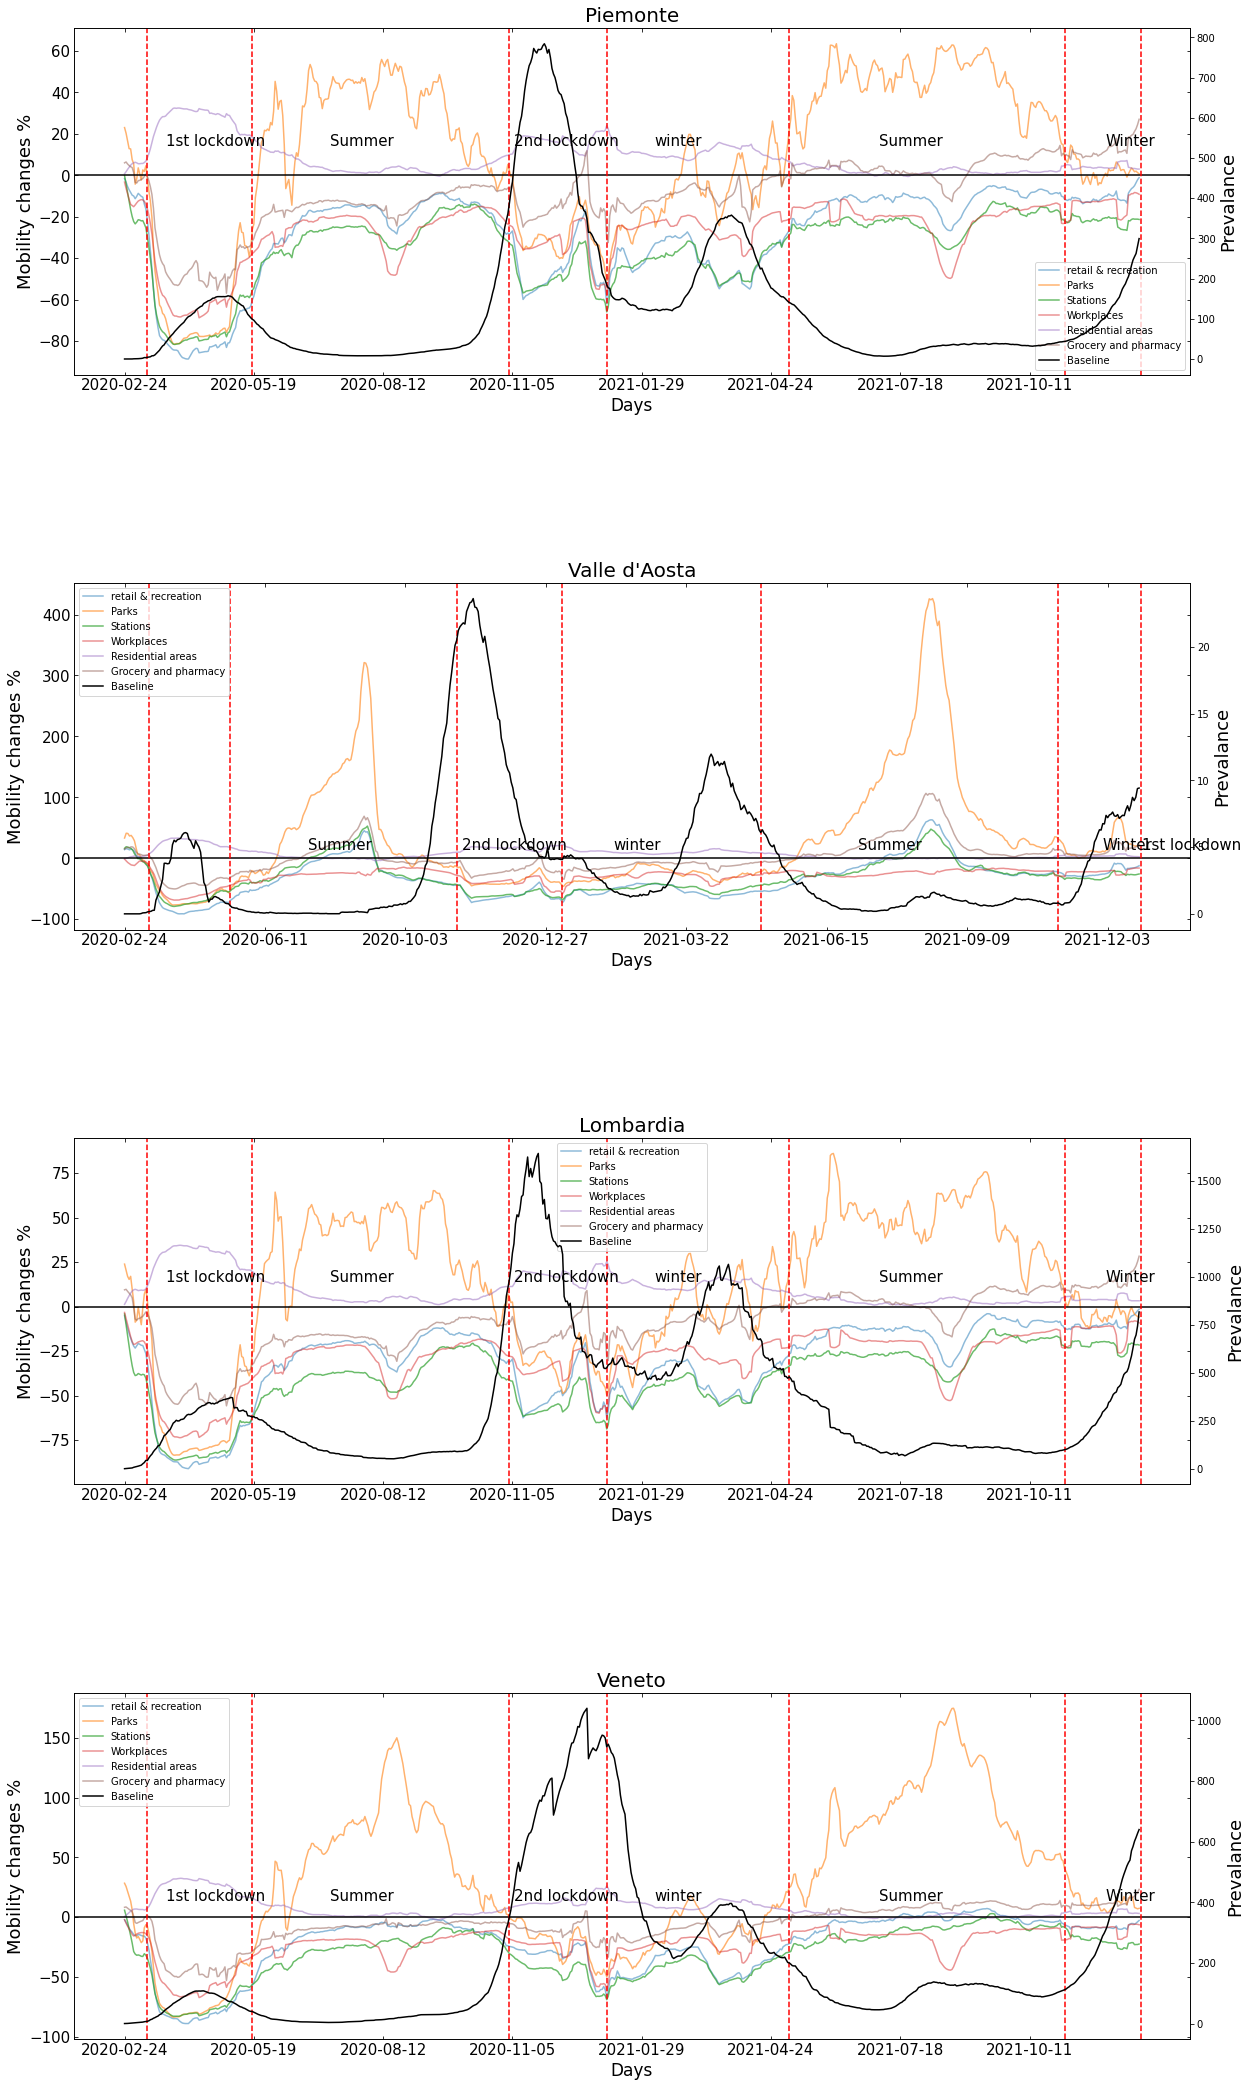

In [38]:
fig, axs = plt.subplots(4,1, figsize=(20, 37))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 
        
        pr=reg_inc['infected']/100
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45)  
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('Prevalance',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')

    
        axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
        axs[b].grid(linestyle='--',alpha=0.8,which='both')
   
        reg_startdate1 = '2020-03-10'
        reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)
        reg_startdate2='2020-05-18'
        reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)
        reg_startdate3='2020-12-21'
        reg_enddate3 = '2021-01-06'#get_mobdates(Rt_startdate3,Rt_enddate3)
        reg_startdate4 = '2021-05-06'
        reg_enddate4 = '2021-11-03'
        reg_startdate5 = '2021-11-03'
        reg_enddate5 = '2021-12-31'

        


        axs[b].text(x='2020-03-22',y=14,s="1st lockdown",color='black',size=15)
        axs[b].text(x='2020-07-08',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2020-11-06',y=14,s="2nd lockdown",color='black',size=15)
        axs[b].text(x='2021-02-06',y=14,s="winter",color='black',size=15)
        axs[b].text(x='2021-07-04',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2021-11-30',y=14,s="Winter",color='black',size=15)


        axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate4,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate5,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate5,color='red',linestyle='--')
        
        
        axs[b].legend(loc='best')
        
plt.savefig('1')

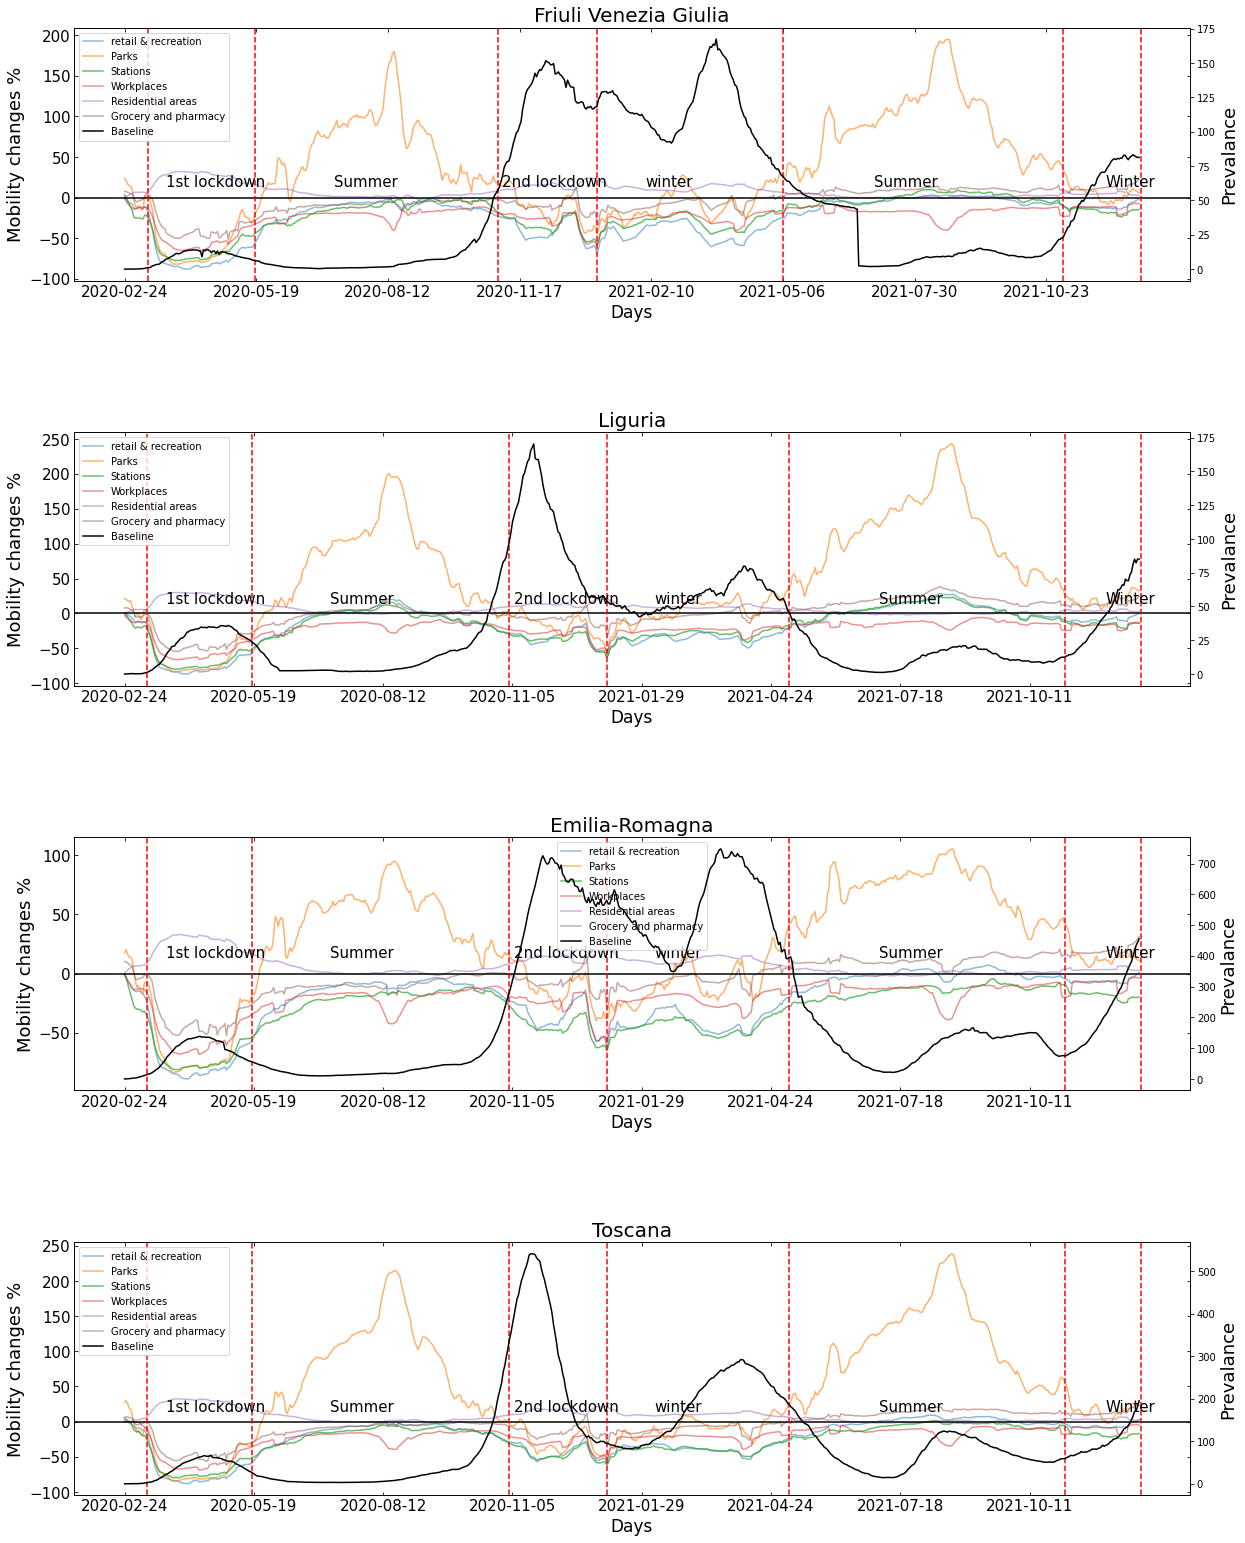

In [39]:
fig, axs = plt.subplots(4,1, figsize=(20, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45)  
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('Prevalance',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')

    
        axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
        axs[b].grid(linestyle='--',alpha=0.8,which='both')
   
        reg_startdate1 = '2020-03-10'
        reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)
        reg_startdate2='2020-05-18'
        reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)
        reg_startdate3='2020-12-21'
        reg_enddate3 = '2021-01-06'#get_mobdates(Rt_startdate3,Rt_enddate3)
        reg_startdate4 = '2021-05-06'
        reg_enddate4 = '2021-11-03'
        reg_startdate5 = '2021-11-03'
        reg_enddate5 = '2021-12-31'

        


        axs[b].text(x='2020-03-22',y=14,s="1st lockdown",color='black',size=15)
        axs[b].text(x='2020-07-08',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2020-11-06',y=14,s="2nd lockdown",color='black',size=15)
        axs[b].text(x='2021-02-06',y=14,s="winter",color='black',size=15)
        axs[b].text(x='2021-07-04',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2021-11-30',y=14,s="Winter",color='black',size=15)


        axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate4,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate5,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate5,color='red',linestyle='--')
        
        
        
        axs[b].legend(loc='best')
        
        
plt.savefig('2')

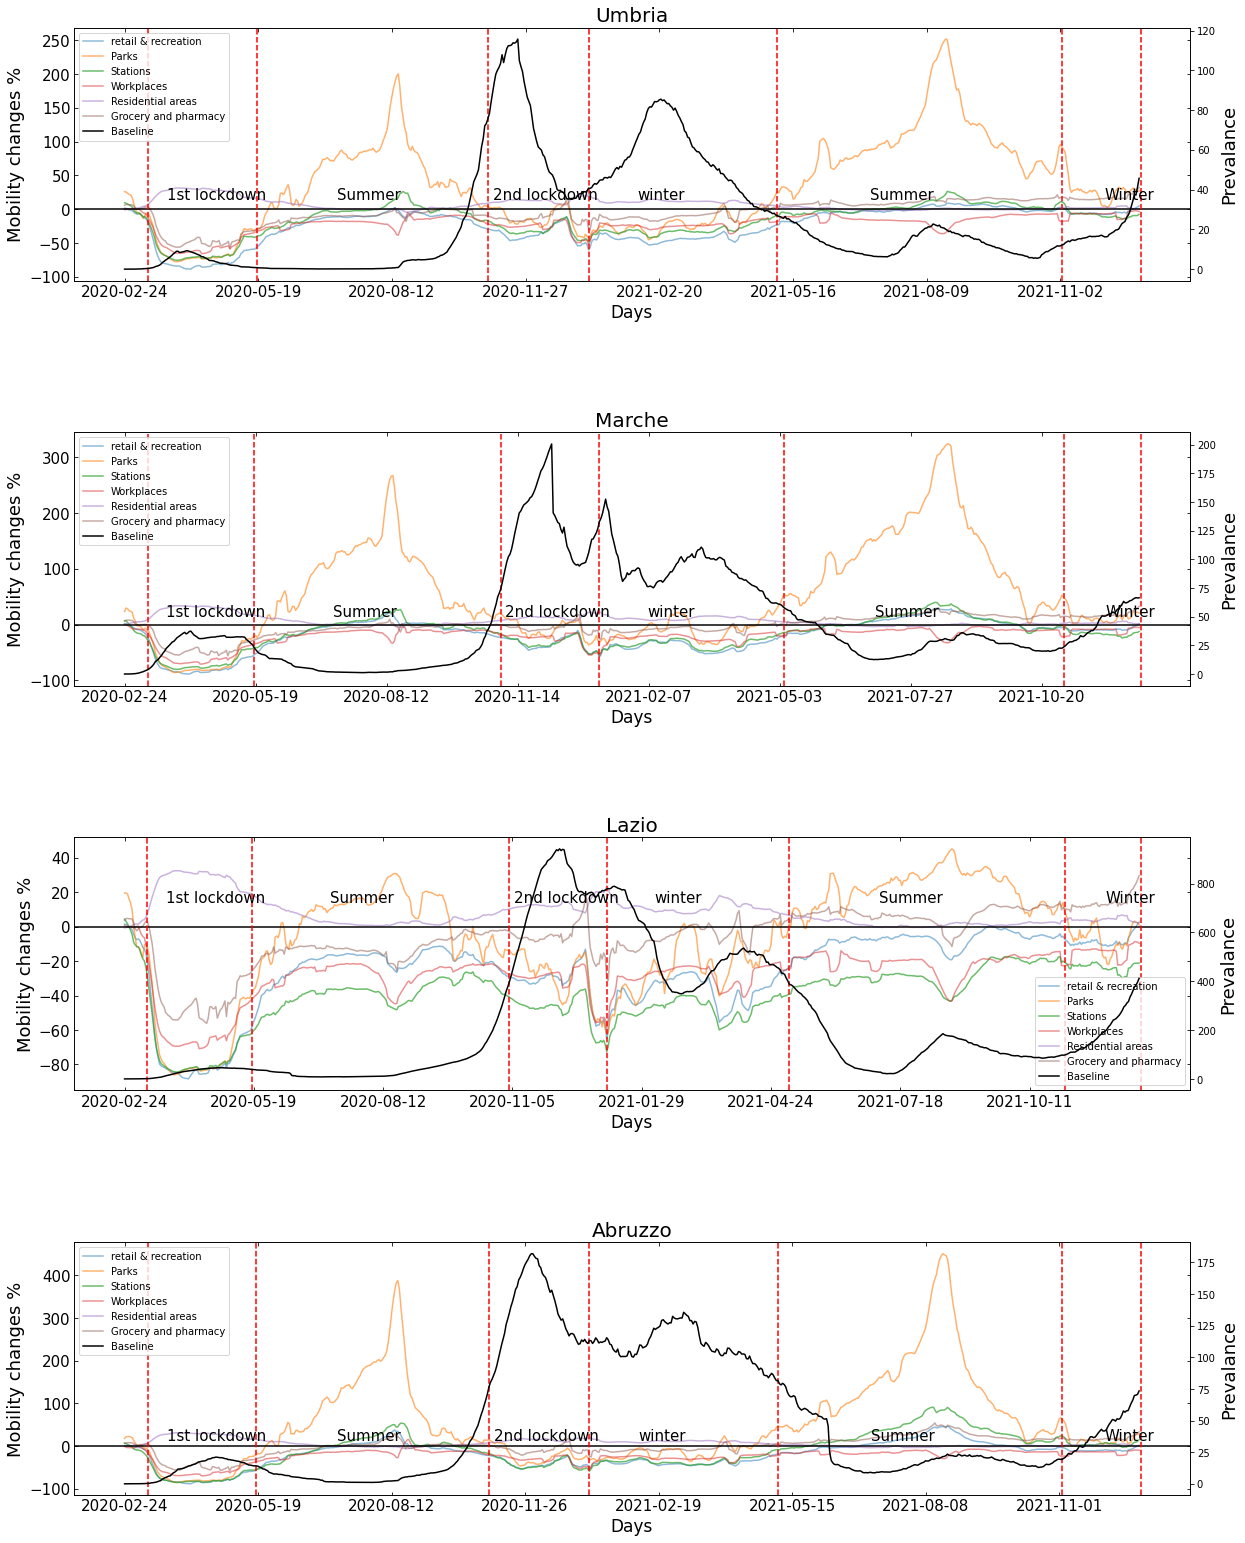

In [40]:
fig, axs = plt.subplots(4,1, figsize=(20, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Umbria',
 'Marche',
 'Lazio',
 'Abruzzo']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45)  
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('Prevalance',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')

    
        axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
        axs[b].grid(linestyle='--',alpha=0.8,which='both')
   
        reg_startdate1 = '2020-03-10'
        reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)
        reg_startdate2='2020-05-18'
        reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)
        reg_startdate3='2020-12-21'
        reg_enddate3 = '2021-01-06'#get_mobdates(Rt_startdate3,Rt_enddate3)
        reg_startdate4 = '2021-05-06'
        reg_enddate4 = '2021-11-03'
        reg_startdate5 = '2021-11-03'
        reg_enddate5 = '2021-12-31'

        


        axs[b].text(x='2020-03-22',y=14,s="1st lockdown",color='black',size=15)
        axs[b].text(x='2020-07-08',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2020-11-06',y=14,s="2nd lockdown",color='black',size=15)
        axs[b].text(x='2021-02-06',y=14,s="winter",color='black',size=15)
        axs[b].text(x='2021-07-04',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2021-11-30',y=14,s="Winter",color='black',size=15)


        axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate4,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate5,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate5,color='red',linestyle='--')
        
        
        axs[b].legend(loc='best')
        
plt.savefig('3')

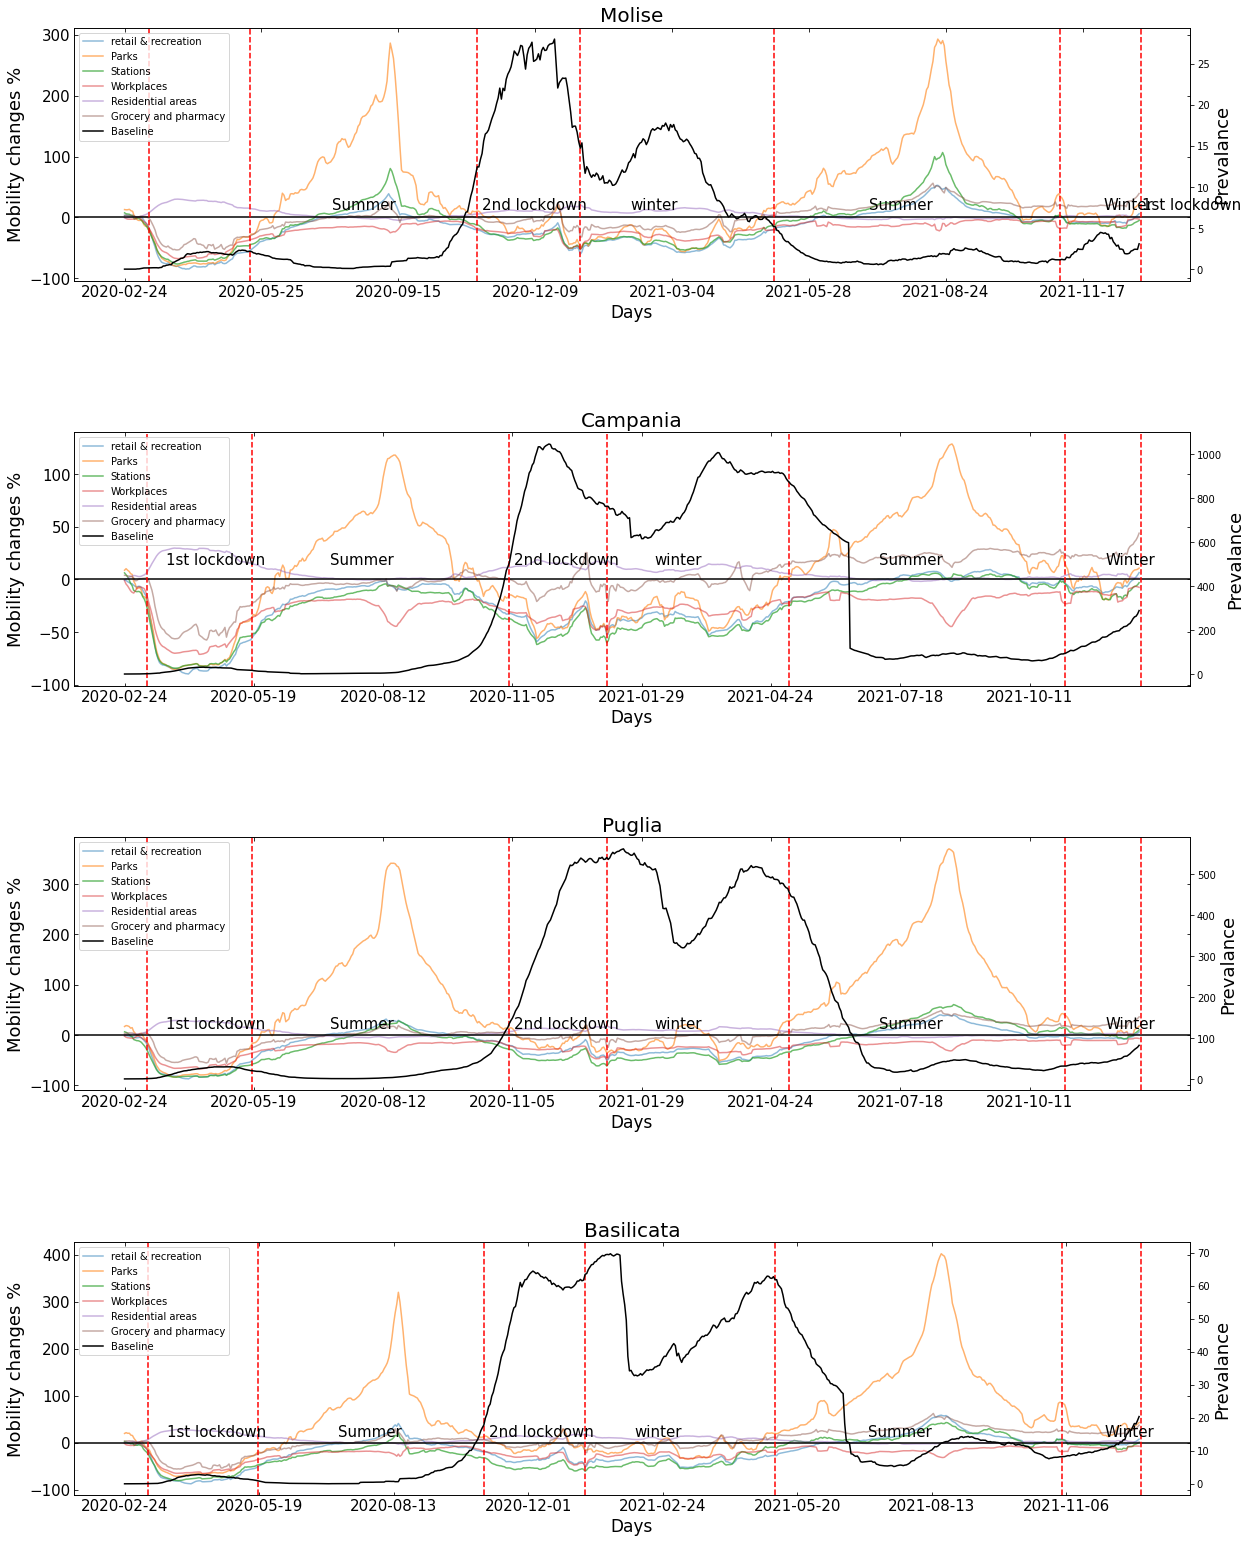

In [41]:
fig, axs = plt.subplots(4,1, figsize=(20, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Molise',
 'Campania',
 'Puglia',
 'Basilicata']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45)  
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('Prevalance',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')

    
        axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
        axs[b].grid(linestyle='--',alpha=0.8,which='both')
   
        reg_startdate1 = '2020-03-10'
        reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)
        reg_startdate2='2020-05-18'
        reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)
        reg_startdate3='2020-12-21'
        reg_enddate3 = '2021-01-06'#get_mobdates(Rt_startdate3,Rt_enddate3)
        reg_startdate4 = '2021-05-06'
        reg_enddate4 = '2021-11-03'
        reg_startdate5 = '2021-11-03'
        reg_enddate5 = '2021-12-31'

        


        axs[b].text(x='2020-03-22',y=14,s="1st lockdown",color='black',size=15)
        axs[b].text(x='2020-07-08',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2020-11-06',y=14,s="2nd lockdown",color='black',size=15)
        axs[b].text(x='2021-02-06',y=14,s="winter",color='black',size=15)
        axs[b].text(x='2021-07-04',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2021-11-30',y=14,s="Winter",color='black',size=15)


        axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate4,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate5,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate5,color='red',linestyle='--')
        
        
        
        axs[b].legend(loc='best')
        
        
plt.savefig('4')

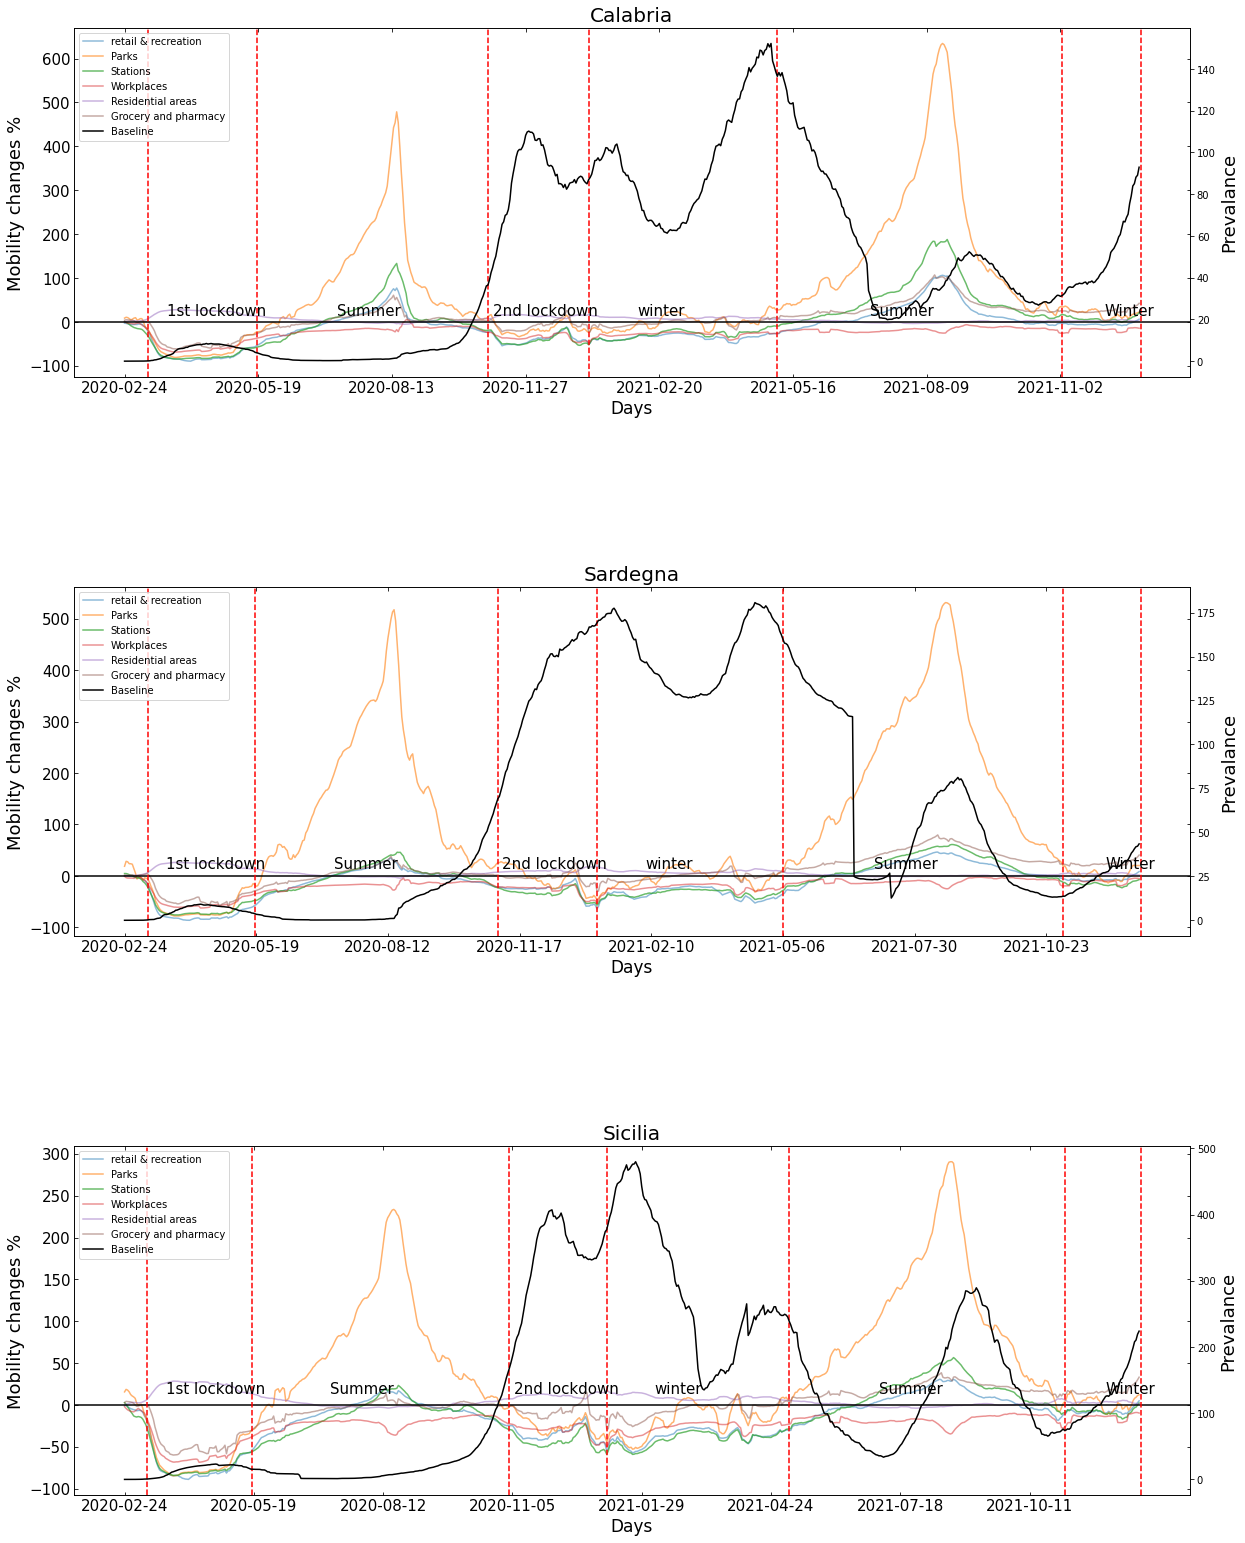

In [42]:
fig, axs = plt.subplots(3,1, figsize=(20, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Calabria',
 'Sardegna',
 'Sicilia']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45)  
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('Prevalance',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')

    
        axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
        axs[b].grid(linestyle='--',alpha=0.8,which='both')
   
        reg_startdate1 = '2020-03-10'
        reg_enddate1 =  '2020-05-18'     #get_mobdates(Rt_startdate1,Rt_enddate1)
        reg_startdate2='2020-05-18'
        reg_enddate2 ='2020-11-03'# get_mobdates(Rt_startdate2,Rt_enddate2)
        reg_startdate3='2020-12-21'
        reg_enddate3 = '2021-01-06'#get_mobdates(Rt_startdate3,Rt_enddate3)
        reg_startdate4 = '2021-05-06'
        reg_enddate4 = '2021-11-03'
        reg_startdate5 = '2021-11-03'
        reg_enddate5 = '2021-12-31'

        


        axs[b].text(x='2020-03-22',y=14,s="1st lockdown",color='black',size=15)
        axs[b].text(x='2020-07-08',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2020-11-06',y=14,s="2nd lockdown",color='black',size=15)
        axs[b].text(x='2021-02-06',y=14,s="winter",color='black',size=15)
        axs[b].text(x='2021-07-04',y=14,s="Summer",color='black',size=15)
        axs[b].text(x='2021-11-30',y=14,s="Winter",color='black',size=15)


        axs[b].axvline(x=reg_startdate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate1,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate2,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate3,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate4,color='red',linestyle='--')
        axs[b].axvline(x=reg_startdate5,color='red',linestyle='--')
        axs[b].axvline(x=reg_enddate5,color='red',linestyle='--')
        
        
        axs[b].legend(loc='best')
        
        
plt.savefig('5')

In [44]:
reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
reg_mob = reg_mob[reg_mob['date'].between('2020-02-24','2021-12-30')]
reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
reg_inc = reg_inc[reg_inc['date'].between('2020-02-24','2021-12-30')]
 

idx1 = pd.Index(reg_inc['date'])
idx2 = pd.Index(reg_mob['date'])

missing_dates = idx1.difference(idx2) 

for w in range(len(missing_dates)):
    reg_inc = reg_inc[reg_inc.date != missing_dates[w]]

missing_dates2 = idx2.difference(idx1) 

for q in range(len(missing_dates2)):
    reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
print(len(reg_inc))
print(len(reg_mob))

668
668


-------------------------------------------------------------------------------------------------------------